

# Investigation of TMDb (The Movie Database) Movie Data from 1960-2015

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I have chosen to use TMDb Movie data for analysis. This dataset includes a list of about 10,000 movie listings with characteristics like cast, movie runtime, release year, budget and revenue. A full list of characteristics in each column is listed further in the report. 

## Questions to Analyze and Answer: 
1. Which properties pertain to higher vote average?
2. Which genres make the most movies?
3. Which director (production company) made the most movies?
4. Which year had the highest profitability?? 
5. Which movie profited the most and by how much?

In [987]:
# Importing necessary libraries as well as reading in the dataset csv file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Here we will be looking at our data, and trying to understand it for further analysis. We will look at the shape of the data, which data type is each characteristic and other high level properties to garner more information prior to cleaning and analysis.

In [988]:
# After loading the data, lets take a look at how our data looks with the first few rows 

df.head()

# We can see that cast members, genres and production companies are separated by "|"

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [989]:
# Looking at how many rows and columns for this data set

df.shape #10866 movie titles 
df.nunique() #10865 unique id's 

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [990]:
# There are 21 Columns
# id- unique identifier (integer)
# imdb_id- Internet Movie Database unique id (string)
# popularity- popularity rating (float)
# budget- movie budget (integer)
# revenue- movie revenue (integer)
# original_title- title of movie (string)
# cast- cast members (string)                    
# homepage- movie website (string)               
# director- director of movie (string)               
# tagline- tagline of movie (string)                 
# keywords- any significant keywords (string)                
# overview- brief summary of movie (string)                
# runtime- movie time length (integer)                 
# genres- genre of movie (string)                  
# production_companies- production companies (string)    
# release_date- release date of movie (string)        
# vote_count- number of votes (integer)         
# vote_average- average votes (float)
# release_year- year movie was released (integer)            
# budget_adj (float)             
# revenue_adj (float)            

In [991]:
# Take a look at general statistics to help in analyzing our dataset to answer the questions above
df.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [992]:
sum(df.duplicated()) #1 duplicated line
df.info() #thousands missing for homepage and tagline


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

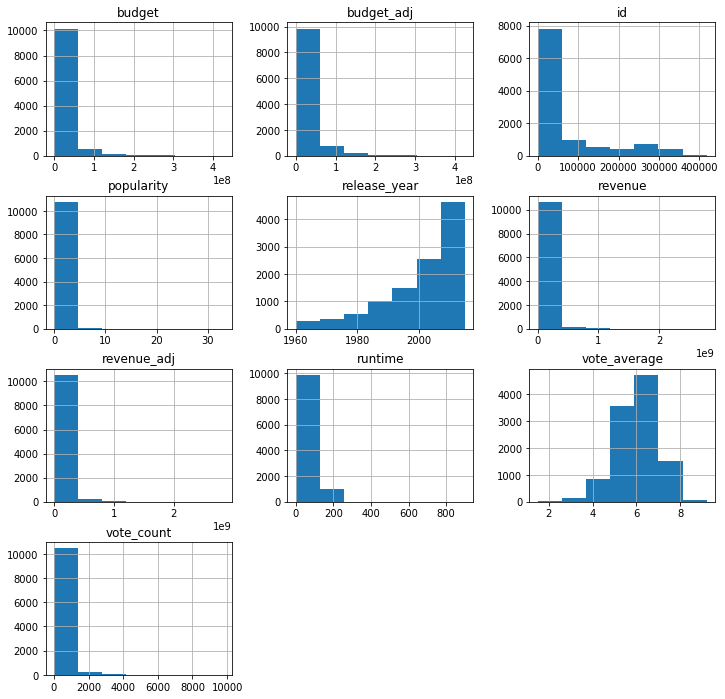

In [993]:
# A look at a histogram of the full data set to get an idea of the dataset as a whole

df.hist(bins=7, figsize=(12,12)); #most movies were released in the late 2000's to 2010's
                          #most movies are <200 mins long
                          #normal vote average distribution

### Data Cleaning 

After taking an intial look at the data, we have to clean the data as much as possible for easier use. Columns that are not needed for analysis will be dropped, and the data types will be looked at as well. 

In [994]:
# Drop any columns that won't be needed in order to perform analysis

df.drop(['homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

# Drop duplicate

df.drop_duplicates(inplace=True)

In [995]:
df.head() #dropped columns check 

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [996]:
sum(df.duplicated()) #0 duplicates check 

0

In [997]:
# Columns with data containing '|', replaced with ',' for easier visual

df['cast'] = df['cast'].str.replace('|', ', ')
df['genres'] = df['genres'].str.replace('|', ', ')
df['production_companies'] = df['production_companies'].str.replace('|', ', ')



<a id='eda'></a>
## Exploratory Data Analysis

In this section, we will be answering all the questions asked above. Comments are inserted as much as seen needed for ease of following along with the analysis. 


### 1. Which Characteristics Pertain to Higher Revenue?

In [998]:
# Which movie has the highest revenue?

df_rev = df.sort_values('revenue', ascending=False)[['revenue','original_title','popularity', 'budget', 'runtime', 'release_year', 'vote_average']]

df_rev
#we see the top five movies, as well as the bottom five. 


,revenue,original_title,popularity,budget,runtime,release_year,vote_average
1386,2781505847,Avatar,9.432768,237000000,162,2009,7.1
3,2068178225,Star Wars: The Force Awakens,11.173104,200000000,136,2015,7.5
5231,1845034188,Titanic,4.355219,200000000,194,1997,7.3
4361,1519557910,The Avengers,7.637767,220000000,143,2012,7.3
0,1513528810,Jurassic World,32.985763,150000000,124,2015,6.5
...,...,...,...,...,...,...,...
1164,0,Jamie Marks Is Dead,0.165741,0,100,2014,5.9
5421,0,Les Randonneurs,0.077201,0,95,1997,4.9
5419,0,Le Pari,0.139139,0,100,1997,6.1
5418,0,Jack Frost,0.041454,0,89,1997,6.0


The top 5 movies with highest revenue are Avatar, Star Wars: The Force Awakens, Titanic, The Avengers and Jurassic World with `$2,781,505,847`, `$2,0681,782,225`, `$1,845,034,188`, `$1,519,557,910` and `$1,513,528,810` respectively.

In [999]:
# An assumption was made in dropping the listings with 0 revenue in order to not skew the data
# Although there are some revenue values that are 2, 3 etc. very low values, that are most likely false data, we will
# only drop the 0.

# Therefore, query movie listings that do not have 0 revenue before plotting

df_rev = df_rev.query('revenue != 0')

df_rev

,revenue,original_title,popularity,budget,runtime,release_year,vote_average
1386,2781505847,Avatar,9.432768,237000000,162,2009,7.1
3,2068178225,Star Wars: The Force Awakens,11.173104,200000000,136,2015,7.5
5231,1845034188,Titanic,4.355219,200000000,194,1997,7.3
4361,1519557910,The Avengers,7.637767,220000000,143,2012,7.3
0,1513528810,Jurassic World,32.985763,150000000,124,2015,6.5
...,...,...,...,...,...,...,...
10607,3,Soylent Green,0.621476,0,97,1973,6.6
1380,3,The Sentinel,0.097126,0,92,1977,6.3
3239,3,Dr. Horrible's Sing-Along Blog,0.352054,200000,42,2008,7.7
5067,2,Shattered Glass,0.462609,6000000,94,2003,6.4


We will plot revenue with popularity, budget, runtime and vote average to see if it is contingent on any of those characteristics.


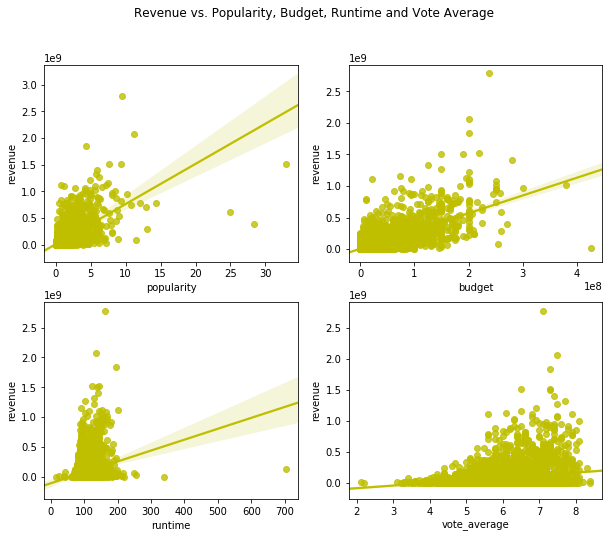

In [1000]:
fig, axis = plt.subplots(2, 2, figsize = (10,8))
fig.suptitle('Revenue vs. Popularity, Budget, Runtime and Vote Average')

sns.regplot(x=df_rev['popularity'], y=df_rev['revenue'], color='y', ax=axis[0][0])
sns.regplot(x=df_rev['budget'], y=df_rev['revenue'], color='y', ax=axis[0][1])
sns.regplot(x=df_rev['runtime'], y=df_rev['revenue'], color='y', ax=axis[1][0])
sns.regplot(x=df_rev['vote_average'], y=df_rev['revenue'], color='y', ax=axis[1][1]);

We see from the plots above that all properties, no matter how minimal, pertain to a higher revenue. We can further analyze these four characteristics through a correlation plot.

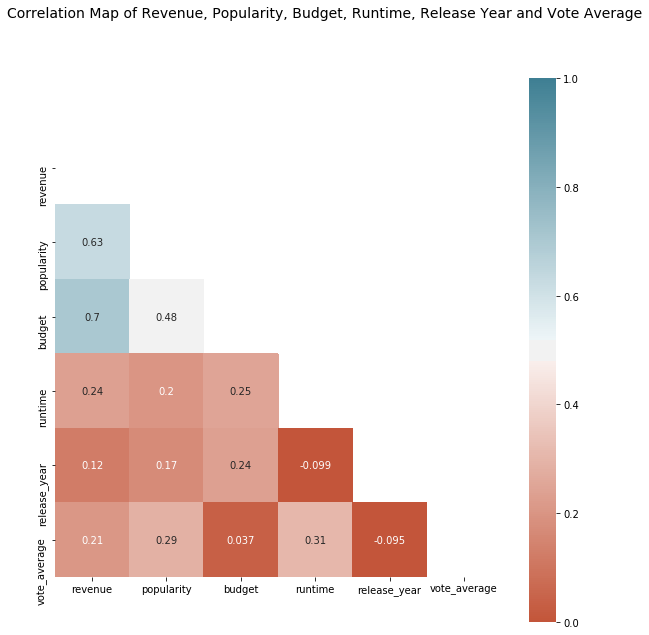

In [1001]:
# Correlation Plot 

fig, ax = plt.subplots(figsize= (10,10))
fig.suptitle('Correlation Map of Revenue, Popularity, Budget, Runtime, Release Year and Vote Average', fontsize=14)
corr = df_rev.corr()
cmap = sns.diverging_palette(20, 220, center='light', as_cmap=True)

#mask upper half of plot

mask = np.zeros_like(corr) #returns array of zeros of same shape and type as given array
mask[np.triu_indices_from(mask)]=True #returns indices for upper triangle of array
ax = sns.heatmap(corr, vmin=0, vmax=1, mask=mask, cmap=cmap, square=True, annot=True)
ax.set_ylim(len(corr), -0.1); #prevent the top and bottom being cut off in the map

From the heat map above, we can see that budget and popularity are most postively correlated with revenue with 0.7 and 0.63 respectively.

### 2. Which Genres make the Most Movies?

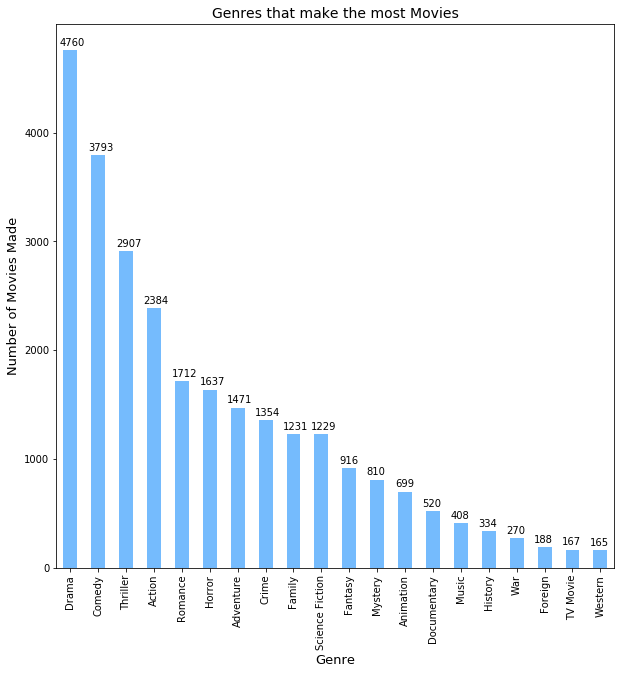

In [1002]:
# Sort data frame to show only 
# df_gen = df.sort_values('vote_average', ascending=False)[['genres', 'vote_average', 'original_title', 'vote_count']]

# data_gen['vote_count'].max() #highest vote count is 9767 
#data_gen = data_gen.query('vote_count == "9767"') 
#data_gen #Inception with highest vote count

# Define a function that will separate the genres and return the value counts of each genre

def counts(x):
    data_dir = df[x].str.cat(sep=', ') #concatenates from separation of ','
    data = pd.Series(data_dir.split(', '))
    count = data.value_counts(ascending=False)
    return count

genre_count = counts('genres')

ax = genre_count.plot(kind='bar', figsize=(10,10), fontsize=10, color='xkcd:sky blue')
ax.set_title('Genres that make the most Movies', fontsize=14)
ax.set_xlabel('Genre', fontsize=13)
ax.set_ylabel('Number of Movies Made', fontsize=13)

# Annotate the bars

for i in ax.patches:
    ax.text(i.get_x()-0.12, i.get_height()+40,                            #.text takes x,y position, and string 
            str(round((i.get_height()), 2)), fontsize=10, color='black'); #get_x moves label left and right, 
                                                                          #get_height moves label up or down

We can see from above that Dramas make the most movies at 4760 listings, followed by Comedies (3793) and Thrillers (2907). Western movies make the least with only 165 films.


### 3. Which Director (and Production Company) Made the Most Movies?

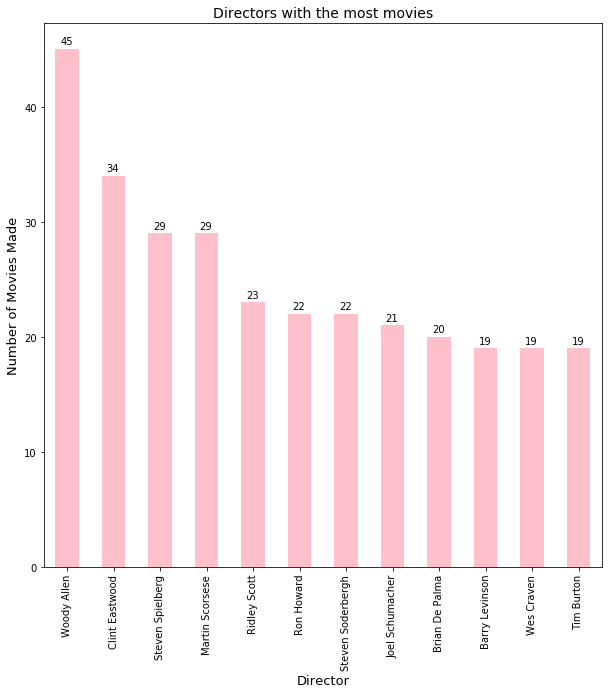

In [1003]:
# Call counts function that will separate the directors and return the value counts of each director

director_count = counts('director') #Woody Allen directed 45 movies, Debbie Isitt- among many others has directed 1
director_count = director_count[counts('director') >= 19] #only use top 12 directors 

# Plot the value counts as a bar graph for easy visual

ax = director_count.plot(kind='bar', figsize=(10,10), fontsize=10, color='pink')
ax.set_title('Directors with the most movies', fontsize=14)
ax.set_xlabel('Director', fontsize=13)
ax.set_ylabel('Number of Movies Made', fontsize=13)

for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+0.4,                           
            str(round((i.get_height()), 2)), fontsize=10, color='black');



Woody Allen has directed the most movies, followed by Clint Eastwood and Steven Spielberg.

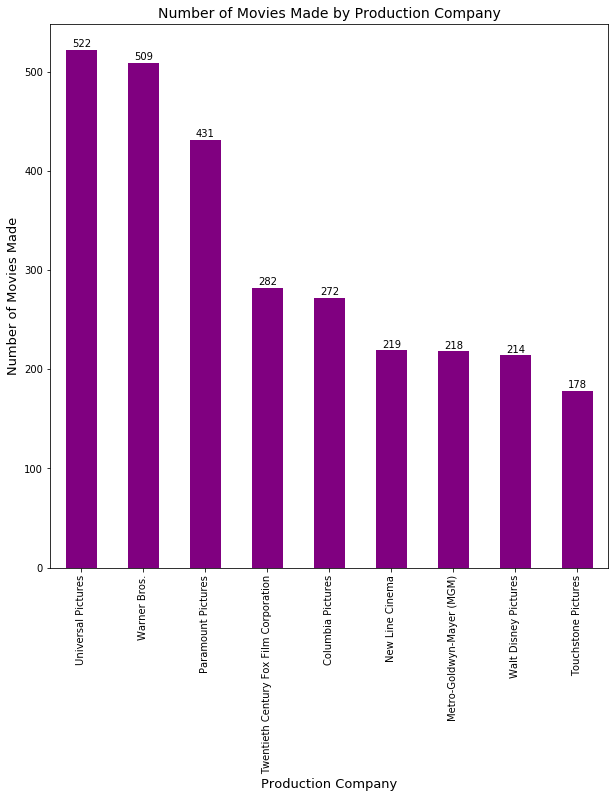

In [1004]:
# Call counts function from above to perform same command for Production Companies 

counts('production_companies') #Universal Pictures at number 1 with 460 movies 
production_count =  counts('production_companies')
production_count = production_count[counts('production_companies') >= 175]

# Plot Bar Graph with top 7 production companies

ax = production_count.plot(kind='bar', figsize=(10,10), fontsize=10, color='purple')
ax.set_title('Number of Movies Made by Production Company', fontsize=14)
ax.set_xlabel('Production Company', fontsize=13)
ax.set_ylabel('Number of Movies Made', fontsize=13)

for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3,                           
            str(round((i.get_height()), 2)), fontsize=10, color='black');

Universal Pictures has produced the most movies, followed by Paramount Pictures and Warner Brothers.

### 4. Which Year had the Highest Revenue and Profitability?


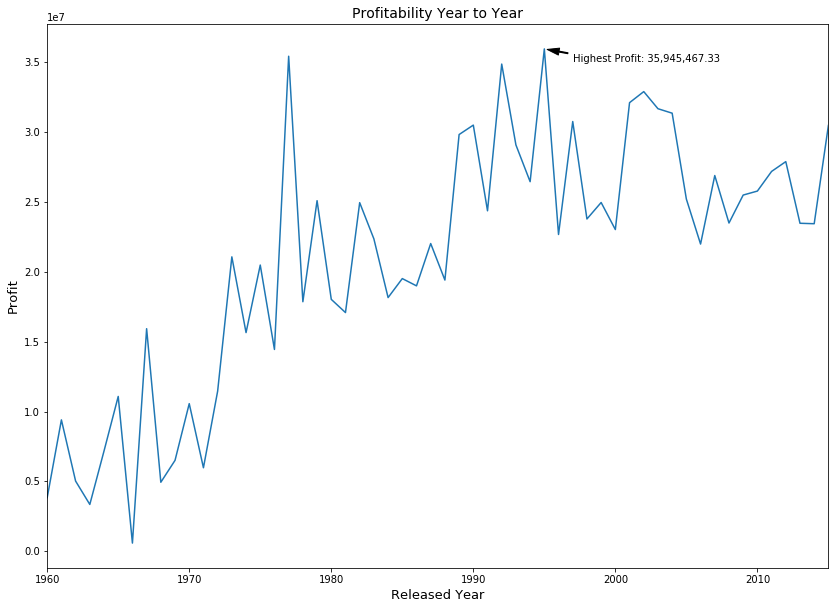

In [1029]:
# First define profit and add as a column

df['profit'] = df['revenue'] - df['budget']

df_year = df.groupby('release_year').mean()['profit'] #groupby year with average profits

df_year.sort_values(ascending=False) #sort data in descending order to see top profitable years

# Plot df_profit for visual

ax = df_year.plot(kind='line', figsize=(14,10), fontsize=10)

ax.set_title('Profitability Year to Year', fontsize=14)
ax.set_xlabel('Released Year', fontsize=13)
ax.set_ylabel('Profit', fontsize=13)

df_year.max() #highest profit 35945467.33142857

ax.annotate('Highest Profit: 35,945,467.33', xy=(1995, 3.594546733142857e7), xytext=(1997, 3.5e7), 
            arrowprops=dict(facecolor='black', shrink=0.1, headwidth=7, width=1));


We can see from the line plot above and from viewing the data_year data frame in descending order that 1995, 1977, 2002, 2001, 2003 were the top highest profiting years. The longest time was 2001-2004 where we see fairly high profits year to year. 

### 5. Which Movie Profited the Most and by How Much?

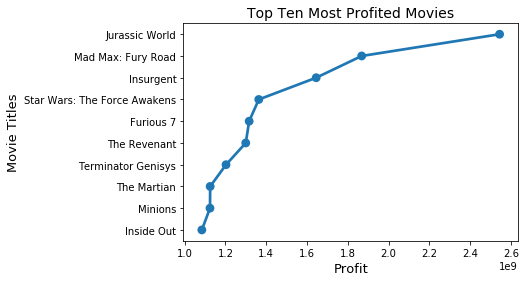

In [1030]:
# Sorting values of profit in original df to the profit column new df

df_movieprof['profit'] = df['profit'].sort_values(ascending=False)

df_movieprof['original_title'] = df['original_title'] #use same movie title for df_movieprof as df
 
titles = list(map(str, (df_movieprof['original_title'])))   #mapping original titles as strings into a list 
x = list(titles[ :10])                                      #x values are top ten movie titles 
y = list(df_movieprof['profit'][ :10])                      #y values are top ten corresponding profit values

ax = sns.pointplot(x=y, y=x) #seaborn pointplot used for easy comparison between categorical data

ax.set_title('Top Ten Most Profited Movies', fontsize=14)
ax.set_ylabel('Movie Titles', fontsize=13)
ax.set_xlabel('Profit', fontsize=13);


We can see from the plot above that the highest profiting movie was Jurassic Word, followed by Mad Max: Fury Road, and third with Insurgent.

<a id='conclusions'></a>
## Conclusions

Concluding our analysis of TMDb movie data, we were able to make many correlations and understand which movies were the most profitable, as well as many other understandings of the data. Below are a list of concluding statements as well as a list of limitations I faced when analyzing this dataset. 

After each question answered, a short sentence was written with the findings but will repeat here for easy access.

1. Popularity and budget correlated to high revenues.
2. Movies under the Drama, Comedy, and Thriller genres make the most movies.
3. Woody Allen has directed the most movies (45 movies), followed by Clint Eastwood.
    - Universal Pictures has produced the most movies, followed by Paramount Pictures.
4. 1995 was the top highest profiting year. The longest profiting time was 2001-2004 where we see high profits.
5. Jurassic World (2015) was the highest profiting movie, followed by Mad Max: Fury Road (2015).


### Limitations

1. Revenue and Budget data seemed to be incorrect, especially for data values that were 0 even though a web search shows a revenue in the millions. 
2. Revenue and Budget data were given only as an integer value without currency stated, which could have an affect for the conclusions. A large portion of these listings were US produced movies, which can imply that all money values are in USD, but there are many foreign films listed as well. 
    - If the currency was stated in the data, we could have used that information for analyzing where around the world movies were most popular/ highest revenue.
3. There was a large amount of NaN data which could have affected the analysis greatly.
4. A larger profile of each movie listing, including writers or awards won could have led to another insightful analysis and conclusion.